## MNIST GAN

In [11]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from keras.datasets import mnist
from tqdm import tqdm
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam

In [3]:
def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = (x_train.astype(np.float32) - 127.5)/127.5
    
    # convert shape of x_train from (60000, 28, 28) to (60000, 784) 
    # 784 columns per row
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

(X_train, y_train, X_test, y_test)=load_data()
print(X_train.shape)


(60000, 784)


In [4]:
def adam_optimizer():
    return adam(lr=0.0002, beta_1=0.5)

In [5]:
def create_generator():
    generator=Sequential()
    generator.add(Dense(units=256,input_dim=100))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=784, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator

g=create_generator()
g.summary()

W0716 12:26:25.792580 139689979713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0716 12:26:25.809925 139689979713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0716 12:26:25.813294 139689979713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0716 12:26:25.854139 139689979713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0716 12:26:25.857341 139689979713344 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               803600    
Total para

In [6]:
def create_discriminator():
    discriminator=Sequential()
    discriminator.add(Dense(units=1024,input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
       
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

d =create_discriminator()
d.summary()

W0716 12:26:25.888614 139689979713344 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0716 12:26:25.894159 139689979713344 deprecation.py:506] From /usr/local/lib/python3.7/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
__________

In [7]:
def create_gan(discriminator, generator):
    discriminator.trainable=False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output= discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

gan = create_gan(d,g)
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [8]:
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise= np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(100,28,28)
    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generated_images[i], interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('gan_generated_image %d.png' % epoch)

In [9]:
def training(epochs=10, batch_size=128):
    
    #Loading the data
    (X_train, y_train, X_test, y_test) = load_data()
    batch_count = X_train.shape[0] / batch_size
    
    # Creating GAN
    generator= create_generator()
    discriminator= create_discriminator()
    gan = create_gan(discriminator, generator)
    
    for e in range(1,epochs+1 ):
        print("Epoch %d" %e)
        for _ in tqdm(range(batch_size)):
        #generate  random noise as an input  to  initialize the  generator
            noise= np.random.normal(0,1, [batch_size, 100])
            
            # Generate fake MNIST images from noised input
            generated_images = generator.predict(noise)
            
            # Get a random set of  real images
            image_batch =X_train[np.random.randint(low=0,high=X_train.shape[0],size=batch_size)]
            
            #Construct different batches of  real and fake data 
            X= np.concatenate([image_batch, generated_images])
            
            # Labels for generated and real data
            y_dis=np.zeros(2*batch_size)
            y_dis[:batch_size]=0.9
            
            #Pre train discriminator on  fake and real data  before starting the gan. 
            discriminator.trainable=True
            discriminator.train_on_batch(X, y_dis)
            
            #Tricking the noised input of the Generator as real data
            noise= np.random.normal(0,1, [batch_size, 100])
            y_gen = np.ones(batch_size)
            
            # During the training of gan, 
            # the weights of discriminator should be fixed. 
            #We can enforce that by setting the trainable flag
            discriminator.trainable=False
            
            #training  the GAN by alternating the training of the Discriminator 
            #and training the chained GAN model with Discriminator’s weights freezed.
            gan.train_on_batch(noise, y_gen)
            
        if e == 1 or e % 100 == 0:
           
            plot_generated_images(e, generator)
            


  0%|          | 0/128 [00:00<?, ?it/s]

Epoch 1


  2%|▏         | 3/128 [00:00<00:05, 24.17it/s]

Epoch 2


  2%|▏         | 3/128 [00:00<00:05, 23.94it/s]

Epoch 3


  2%|▏         | 3/128 [00:00<00:05, 23.47it/s]

Epoch 4


  2%|▏         | 3/128 [00:00<00:05, 24.14it/s]

Epoch 5


  2%|▏         | 3/128 [00:00<00:05, 23.97it/s]

Epoch 6


  2%|▏         | 3/128 [00:00<00:05, 23.59it/s]

Epoch 7


  2%|▏         | 3/128 [00:00<00:05, 23.78it/s]

Epoch 8


  2%|▏         | 3/128 [00:00<00:05, 22.71it/s]

Epoch 9


  2%|▏         | 3/128 [00:00<00:05, 23.05it/s]

Epoch 10


  2%|▏         | 3/128 [00:00<00:05, 23.35it/s]

Epoch 11


  2%|▏         | 3/128 [00:00<00:05, 23.98it/s]

Epoch 12


  2%|▏         | 3/128 [00:00<00:05, 23.88it/s]

Epoch 13


  2%|▏         | 3/128 [00:00<00:05, 23.84it/s]

Epoch 14


  2%|▏         | 3/128 [00:00<00:05, 23.87it/s]

Epoch 15


  2%|▏         | 3/128 [00:00<00:05, 23.94it/s]

Epoch 16


  2%|▏         | 3/128 [00:00<00:05, 23.64it/s]

Epoch 17


  2%|▏         | 3/128 [00:00<00:05, 22.75it/s]

Epoch 18


  2%|▏         | 3/128 [00:00<00:05, 23.39it/s]

Epoch 19


  2%|▏         | 3/128 [00:00<00:05, 23.71it/s]

Epoch 20


  2%|▏         | 3/128 [00:00<00:05, 23.45it/s]

Epoch 21


  2%|▏         | 3/128 [00:00<00:05, 23.99it/s]

Epoch 22


  2%|▏         | 3/128 [00:00<00:05, 23.19it/s]

Epoch 23


  2%|▏         | 3/128 [00:00<00:05, 23.32it/s]

Epoch 24


  2%|▏         | 3/128 [00:00<00:05, 22.61it/s]

Epoch 25


  2%|▏         | 3/128 [00:00<00:05, 24.24it/s]

Epoch 26


  2%|▏         | 3/128 [00:00<00:05, 23.78it/s]

Epoch 27


  2%|▏         | 3/128 [00:00<00:05, 24.34it/s]

Epoch 28


  2%|▏         | 3/128 [00:00<00:05, 24.22it/s]

Epoch 29


  2%|▏         | 3/128 [00:00<00:05, 22.30it/s]

Epoch 30


  2%|▏         | 3/128 [00:00<00:05, 24.24it/s]

Epoch 31


  2%|▏         | 3/128 [00:00<00:05, 23.59it/s]

Epoch 32


  2%|▏         | 3/128 [00:00<00:05, 24.42it/s]

Epoch 33


  2%|▏         | 3/128 [00:00<00:05, 24.28it/s]

Epoch 34


  2%|▏         | 3/128 [00:00<00:05, 24.49it/s]

Epoch 35


  2%|▏         | 3/128 [00:00<00:05, 24.20it/s]

Epoch 36


  2%|▏         | 3/128 [00:00<00:05, 22.10it/s]

Epoch 37


  2%|▏         | 3/128 [00:00<00:05, 24.27it/s]

Epoch 38


  2%|▏         | 3/128 [00:00<00:05, 24.11it/s]

Epoch 39


  2%|▏         | 3/128 [00:00<00:05, 24.27it/s]

Epoch 40


  2%|▏         | 3/128 [00:00<00:05, 24.17it/s]

Epoch 41


  2%|▏         | 3/128 [00:00<00:05, 22.87it/s]

Epoch 42


  2%|▏         | 3/128 [00:00<00:05, 24.20it/s]

Epoch 43


  2%|▏         | 3/128 [00:00<00:05, 23.15it/s]

Epoch 44


  2%|▏         | 3/128 [00:00<00:05, 23.19it/s]

Epoch 45


  2%|▏         | 3/128 [00:00<00:05, 23.56it/s]

Epoch 46


  2%|▏         | 3/128 [00:00<00:05, 23.16it/s]

Epoch 47


  2%|▏         | 3/128 [00:00<00:05, 23.68it/s]

Epoch 48


  2%|▏         | 3/128 [00:00<00:05, 23.53it/s]

Epoch 49


  2%|▏         | 3/128 [00:00<00:05, 24.20it/s]

Epoch 50


  2%|▏         | 3/128 [00:00<00:05, 23.88it/s]

Epoch 51


  2%|▏         | 3/128 [00:00<00:05, 21.14it/s]

Epoch 52


  2%|▏         | 3/128 [00:00<00:05, 23.36it/s]

Epoch 53


  2%|▏         | 3/128 [00:00<00:05, 22.44it/s]

Epoch 54


  2%|▏         | 3/128 [00:00<00:05, 22.09it/s]

Epoch 55


  2%|▏         | 3/128 [00:00<00:05, 22.05it/s]

Epoch 56


  2%|▏         | 3/128 [00:00<00:05, 24.92it/s]

Epoch 57


  2%|▏         | 2/128 [00:00<00:06, 19.42it/s]

Epoch 58


  2%|▏         | 2/128 [00:00<00:06, 19.27it/s]

Epoch 59


  2%|▏         | 3/128 [00:00<00:04, 26.21it/s]

Epoch 60


  2%|▏         | 3/128 [00:00<00:05, 24.63it/s]

Epoch 61


  2%|▏         | 3/128 [00:00<00:04, 26.09it/s]

Epoch 62


  2%|▏         | 3/128 [00:00<00:05, 24.11it/s]

Epoch 63


  2%|▏         | 3/128 [00:00<00:04, 25.57it/s]

Epoch 64


  2%|▏         | 3/128 [00:00<00:04, 25.22it/s]

Epoch 65


  2%|▏         | 3/128 [00:00<00:04, 25.10it/s]

Epoch 66


  2%|▏         | 3/128 [00:00<00:04, 25.24it/s]

Epoch 67


  2%|▏         | 3/128 [00:00<00:04, 25.44it/s]

Epoch 68


  2%|▏         | 3/128 [00:00<00:04, 25.46it/s]

Epoch 69


  2%|▏         | 3/128 [00:00<00:04, 26.33it/s]

Epoch 70


  2%|▏         | 3/128 [00:00<00:04, 25.98it/s]

Epoch 71


  2%|▏         | 3/128 [00:00<00:05, 24.11it/s]

Epoch 72


  2%|▏         | 3/128 [00:00<00:04, 25.35it/s]

Epoch 73


  2%|▏         | 3/128 [00:00<00:04, 25.77it/s]

Epoch 74


  2%|▏         | 3/128 [00:00<00:04, 25.91it/s]

Epoch 75


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 76


  2%|▏         | 3/128 [00:00<00:04, 26.10it/s]

Epoch 77


  2%|▏         | 3/128 [00:00<00:04, 25.86it/s]

Epoch 78


  2%|▏         | 3/128 [00:00<00:04, 25.95it/s]

Epoch 79


  2%|▏         | 3/128 [00:00<00:04, 25.42it/s]

Epoch 80


  2%|▏         | 3/128 [00:00<00:04, 26.12it/s]

Epoch 81


  2%|▏         | 3/128 [00:00<00:04, 26.22it/s]

Epoch 82


  2%|▏         | 3/128 [00:00<00:05, 24.39it/s]

Epoch 83


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 84


  2%|▏         | 3/128 [00:00<00:04, 25.83it/s]

Epoch 85


  2%|▏         | 3/128 [00:00<00:04, 25.91it/s]

Epoch 86


  2%|▏         | 3/128 [00:00<00:04, 25.60it/s]

Epoch 87


  2%|▏         | 3/128 [00:00<00:04, 26.01it/s]

Epoch 88


  2%|▏         | 3/128 [00:00<00:04, 26.04it/s]

Epoch 89


  2%|▏         | 3/128 [00:00<00:04, 25.53it/s]

Epoch 90


  2%|▏         | 3/128 [00:00<00:04, 26.15it/s]

Epoch 91


  2%|▏         | 3/128 [00:00<00:04, 26.18it/s]

Epoch 92


  2%|▏         | 3/128 [00:00<00:04, 25.78it/s]

Epoch 93


  2%|▏         | 3/128 [00:00<00:05, 24.57it/s]

Epoch 94


  2%|▏         | 3/128 [00:00<00:04, 25.19it/s]

Epoch 95


  2%|▏         | 3/128 [00:00<00:04, 25.94it/s]

Epoch 96


  2%|▏         | 3/128 [00:00<00:04, 26.20it/s]

Epoch 97


  2%|▏         | 3/128 [00:00<00:04, 25.75it/s]

Epoch 98


  2%|▏         | 3/128 [00:00<00:04, 25.97it/s]

Epoch 99


  2%|▏         | 3/128 [00:00<00:04, 26.12it/s]

Epoch 100


  2%|▏         | 3/128 [00:00<00:04, 25.59it/s]

Epoch 101


  2%|▏         | 3/128 [00:00<00:04, 26.20it/s]

Epoch 102


  2%|▏         | 3/128 [00:00<00:04, 26.02it/s]

Epoch 103


  2%|▏         | 3/128 [00:00<00:04, 26.11it/s]

Epoch 104


  2%|▏         | 3/128 [00:00<00:04, 25.69it/s]

Epoch 105


  2%|▏         | 3/128 [00:00<00:04, 25.98it/s]

Epoch 106


  2%|▏         | 3/128 [00:00<00:04, 26.20it/s]

Epoch 107


  2%|▏         | 3/128 [00:00<00:04, 25.86it/s]

Epoch 108


  2%|▏         | 3/128 [00:00<00:05, 24.53it/s]

Epoch 109


  2%|▏         | 3/128 [00:00<00:04, 25.40it/s]

Epoch 110


  2%|▏         | 3/128 [00:00<00:04, 25.49it/s]

Epoch 111


  2%|▏         | 3/128 [00:00<00:04, 25.83it/s]

Epoch 112


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 113


  2%|▏         | 3/128 [00:00<00:04, 26.37it/s]

Epoch 114


  2%|▏         | 3/128 [00:00<00:04, 25.43it/s]

Epoch 115


  2%|▏         | 3/128 [00:00<00:04, 25.78it/s]

Epoch 116


  2%|▏         | 3/128 [00:00<00:04, 25.89it/s]

Epoch 117


  2%|▏         | 3/128 [00:00<00:04, 25.57it/s]

Epoch 118


  2%|▏         | 3/128 [00:00<00:04, 26.45it/s]

Epoch 119


  2%|▏         | 3/128 [00:00<00:05, 24.86it/s]

Epoch 120


  2%|▏         | 3/128 [00:00<00:04, 26.08it/s]

Epoch 121


  2%|▏         | 3/128 [00:00<00:04, 26.08it/s]

Epoch 122


  2%|▏         | 3/128 [00:00<00:04, 25.87it/s]

Epoch 123


  2%|▏         | 3/128 [00:00<00:05, 23.19it/s]

Epoch 124


  2%|▏         | 3/128 [00:00<00:04, 25.89it/s]

Epoch 125


  2%|▏         | 3/128 [00:00<00:04, 25.62it/s]

Epoch 126


  2%|▏         | 3/128 [00:00<00:04, 26.02it/s]

Epoch 127


  2%|▏         | 3/128 [00:00<00:04, 25.52it/s]

Epoch 128


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 129


  2%|▏         | 3/128 [00:00<00:04, 25.91it/s]

Epoch 130


  2%|▏         | 3/128 [00:00<00:04, 25.90it/s]

Epoch 131


  2%|▏         | 3/128 [00:00<00:04, 25.82it/s]

Epoch 132


  2%|▏         | 3/128 [00:00<00:04, 26.02it/s]

Epoch 133


  2%|▏         | 3/128 [00:00<00:04, 26.10it/s]

Epoch 134


  2%|▏         | 3/128 [00:00<00:04, 25.87it/s]

Epoch 135


  2%|▏         | 3/128 [00:00<00:05, 24.59it/s]

Epoch 136


  2%|▏         | 3/128 [00:00<00:04, 25.63it/s]

Epoch 137


  2%|▏         | 3/128 [00:00<00:04, 25.78it/s]

Epoch 138


  2%|▏         | 3/128 [00:00<00:04, 26.34it/s]

Epoch 139


  2%|▏         | 3/128 [00:00<00:04, 25.71it/s]

Epoch 140


  2%|▏         | 3/128 [00:00<00:04, 25.97it/s]

Epoch 141


  2%|▏         | 3/128 [00:00<00:04, 26.26it/s]

Epoch 142


  2%|▏         | 3/128 [00:00<00:04, 25.17it/s]

Epoch 143


  2%|▏         | 3/128 [00:00<00:05, 24.92it/s]

Epoch 144


  2%|▏         | 3/128 [00:00<00:04, 25.52it/s]

Epoch 145


  2%|▏         | 3/128 [00:00<00:05, 24.88it/s]

Epoch 146


  2%|▏         | 3/128 [00:00<00:05, 24.91it/s]

Epoch 147


  2%|▏         | 3/128 [00:00<00:04, 25.74it/s]

Epoch 148


  2%|▏         | 3/128 [00:00<00:04, 25.57it/s]

Epoch 149


  2%|▏         | 3/128 [00:00<00:04, 25.78it/s]

Epoch 150


  2%|▏         | 3/128 [00:00<00:04, 25.88it/s]

Epoch 151


  2%|▏         | 3/128 [00:00<00:04, 25.23it/s]

Epoch 152


  2%|▏         | 3/128 [00:00<00:04, 26.06it/s]

Epoch 153


  2%|▏         | 3/128 [00:00<00:05, 24.67it/s]

Epoch 154


  2%|▏         | 3/128 [00:00<00:04, 25.68it/s]

Epoch 155


  2%|▏         | 3/128 [00:00<00:04, 25.88it/s]

Epoch 156


  2%|▏         | 3/128 [00:00<00:04, 26.11it/s]

Epoch 157


  2%|▏         | 3/128 [00:00<00:04, 25.51it/s]

Epoch 158


  2%|▏         | 3/128 [00:00<00:05, 24.32it/s]

Epoch 159


  2%|▏         | 3/128 [00:00<00:04, 25.95it/s]

Epoch 160


  2%|▏         | 3/128 [00:00<00:04, 25.73it/s]

Epoch 161


  2%|▏         | 3/128 [00:00<00:04, 25.53it/s]

Epoch 162


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 163


  2%|▏         | 3/128 [00:00<00:04, 25.44it/s]

Epoch 164


  2%|▏         | 3/128 [00:00<00:04, 26.23it/s]

Epoch 165


  2%|▏         | 3/128 [00:00<00:05, 24.16it/s]

Epoch 166


  2%|▏         | 3/128 [00:00<00:04, 25.99it/s]

Epoch 167


  2%|▏         | 3/128 [00:00<00:04, 25.41it/s]

Epoch 168


  2%|▏         | 3/128 [00:00<00:04, 25.68it/s]

Epoch 169


  2%|▏         | 3/128 [00:00<00:05, 23.25it/s]

Epoch 170


  2%|▏         | 3/128 [00:00<00:04, 26.11it/s]

Epoch 171


  2%|▏         | 3/128 [00:00<00:04, 26.02it/s]

Epoch 172


  2%|▏         | 3/128 [00:00<00:04, 25.42it/s]

Epoch 173


  2%|▏         | 3/128 [00:00<00:04, 25.97it/s]

Epoch 174


  2%|▏         | 3/128 [00:00<00:04, 25.91it/s]

Epoch 175


  2%|▏         | 3/128 [00:00<00:04, 26.03it/s]

Epoch 176


  2%|▏         | 3/128 [00:00<00:04, 25.82it/s]

Epoch 177


  2%|▏         | 3/128 [00:00<00:04, 25.76it/s]

Epoch 178


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 179


  2%|▏         | 3/128 [00:00<00:04, 26.22it/s]

Epoch 180


  2%|▏         | 3/128 [00:00<00:04, 25.55it/s]

Epoch 181


  2%|▏         | 3/128 [00:00<00:04, 26.48it/s]

Epoch 182


  2%|▏         | 3/128 [00:00<00:04, 25.80it/s]

Epoch 183


  2%|▏         | 3/128 [00:00<00:04, 25.77it/s]

Epoch 184


  2%|▏         | 3/128 [00:00<00:04, 25.99it/s]

Epoch 185


  2%|▏         | 3/128 [00:00<00:04, 26.11it/s]

Epoch 186


  2%|▏         | 3/128 [00:00<00:04, 26.50it/s]

Epoch 187


  2%|▏         | 3/128 [00:00<00:04, 25.86it/s]

Epoch 188


  2%|▏         | 3/128 [00:00<00:04, 26.04it/s]

Epoch 189


  2%|▏         | 3/128 [00:00<00:04, 26.01it/s]

Epoch 190


  2%|▏         | 3/128 [00:00<00:05, 24.55it/s]

Epoch 191


  2%|▏         | 3/128 [00:00<00:04, 25.61it/s]

Epoch 192


  2%|▏         | 3/128 [00:00<00:04, 25.65it/s]

Epoch 193


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 194


  2%|▏         | 3/128 [00:00<00:04, 25.50it/s]

Epoch 195


  2%|▏         | 3/128 [00:00<00:04, 25.47it/s]

Epoch 196


  2%|▏         | 3/128 [00:00<00:04, 26.31it/s]

Epoch 197


  2%|▏         | 3/128 [00:00<00:04, 26.26it/s]

Epoch 198


  2%|▏         | 3/128 [00:00<00:04, 25.89it/s]

Epoch 199


  2%|▏         | 3/128 [00:00<00:04, 25.98it/s]

Epoch 200


  2%|▏         | 3/128 [00:00<00:04, 26.16it/s]

Epoch 201


  2%|▏         | 3/128 [00:00<00:04, 25.36it/s]

Epoch 202


  2%|▏         | 3/128 [00:00<00:04, 25.67it/s]

Epoch 203


  2%|▏         | 3/128 [00:00<00:05, 24.87it/s]

Epoch 204


  2%|▏         | 3/128 [00:00<00:04, 25.90it/s]

Epoch 205


  2%|▏         | 3/128 [00:00<00:04, 25.68it/s]

Epoch 206


  2%|▏         | 3/128 [00:00<00:04, 25.57it/s]

Epoch 207


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 208


  2%|▏         | 3/128 [00:00<00:05, 24.65it/s]

Epoch 209


  2%|▏         | 3/128 [00:00<00:04, 25.45it/s]

Epoch 210


  2%|▏         | 3/128 [00:00<00:04, 25.66it/s]

Epoch 211


  2%|▏         | 3/128 [00:00<00:04, 26.17it/s]

Epoch 212


  2%|▏         | 3/128 [00:00<00:04, 25.66it/s]

Epoch 213


  2%|▏         | 3/128 [00:00<00:04, 25.64it/s]

Epoch 214


  2%|▏         | 3/128 [00:00<00:04, 26.00it/s]

Epoch 215


  2%|▏         | 3/128 [00:00<00:04, 26.02it/s]

Epoch 216


  2%|▏         | 3/128 [00:00<00:04, 25.46it/s]

Epoch 217


  2%|▏         | 3/128 [00:00<00:04, 26.20it/s]

Epoch 218


  2%|▏         | 3/128 [00:00<00:04, 26.24it/s]

Epoch 219


  2%|▏         | 3/128 [00:00<00:05, 24.98it/s]

Epoch 220


  2%|▏         | 3/128 [00:00<00:04, 26.06it/s]

Epoch 221


  2%|▏         | 3/128 [00:00<00:04, 25.55it/s]

Epoch 222


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 223


  2%|▏         | 3/128 [00:00<00:04, 26.32it/s]

Epoch 224


  2%|▏         | 3/128 [00:00<00:04, 25.63it/s]

Epoch 225


  2%|▏         | 3/128 [00:00<00:04, 25.83it/s]

Epoch 226


  2%|▏         | 3/128 [00:00<00:04, 25.44it/s]

Epoch 227


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 228


  2%|▏         | 3/128 [00:00<00:04, 25.89it/s]

Epoch 229


  2%|▏         | 3/128 [00:00<00:04, 25.49it/s]

Epoch 230


  2%|▏         | 3/128 [00:00<00:04, 25.78it/s]

Epoch 231


  2%|▏         | 3/128 [00:00<00:04, 25.64it/s]

Epoch 232


  2%|▏         | 3/128 [00:00<00:05, 24.20it/s]

Epoch 233


  2%|▏         | 3/128 [00:00<00:04, 26.24it/s]

Epoch 234


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 235


  2%|▏         | 3/128 [00:00<00:04, 26.10it/s]

Epoch 236


  2%|▏         | 3/128 [00:00<00:04, 26.04it/s]

Epoch 237


  2%|▏         | 3/128 [00:00<00:04, 25.26it/s]

Epoch 238


  2%|▏         | 3/128 [00:00<00:05, 24.37it/s]

Epoch 239


  2%|▏         | 3/128 [00:00<00:04, 25.26it/s]

Epoch 240


  2%|▏         | 3/128 [00:00<00:04, 25.99it/s]

Epoch 241


  2%|▏         | 3/128 [00:00<00:04, 25.00it/s]

Epoch 242


  2%|▏         | 3/128 [00:00<00:04, 25.41it/s]

Epoch 243


  2%|▏         | 3/128 [00:00<00:05, 24.09it/s]

Epoch 244


  2%|▏         | 3/128 [00:00<00:04, 25.86it/s]

Epoch 245


  2%|▏         | 3/128 [00:00<00:04, 26.15it/s]

Epoch 246


  2%|▏         | 3/128 [00:00<00:04, 25.82it/s]

Epoch 247


  2%|▏         | 3/128 [00:00<00:04, 25.35it/s]

Epoch 248


  2%|▏         | 3/128 [00:00<00:04, 25.56it/s]

Epoch 249


  2%|▏         | 3/128 [00:00<00:04, 25.84it/s]

Epoch 250


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 251


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 252


  2%|▏         | 3/128 [00:00<00:04, 25.84it/s]

Epoch 253


  2%|▏         | 3/128 [00:00<00:04, 25.74it/s]

Epoch 254


  2%|▏         | 3/128 [00:00<00:05, 24.42it/s]

Epoch 255


  2%|▏         | 3/128 [00:00<00:05, 21.66it/s]

Epoch 256


  2%|▏         | 3/128 [00:00<00:05, 22.32it/s]

Epoch 257


  2%|▏         | 3/128 [00:00<00:04, 26.10it/s]

Epoch 258


  2%|▏         | 3/128 [00:00<00:04, 26.19it/s]

Epoch 259


  2%|▏         | 3/128 [00:00<00:04, 25.40it/s]

Epoch 260


  2%|▏         | 3/128 [00:00<00:04, 25.98it/s]

Epoch 261


  2%|▏         | 3/128 [00:00<00:05, 24.74it/s]

Epoch 262


  2%|▏         | 3/128 [00:00<00:04, 25.30it/s]

Epoch 263


  2%|▏         | 3/128 [00:00<00:04, 25.64it/s]

Epoch 264


  2%|▏         | 3/128 [00:00<00:04, 25.75it/s]

Epoch 265


  2%|▏         | 3/128 [00:00<00:04, 26.08it/s]

Epoch 266


  2%|▏         | 3/128 [00:00<00:05, 24.40it/s]

Epoch 267


  2%|▏         | 3/128 [00:00<00:04, 25.58it/s]

Epoch 268


  2%|▏         | 3/128 [00:00<00:04, 25.76it/s]

Epoch 269


  2%|▏         | 3/128 [00:00<00:04, 25.73it/s]

Epoch 270


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 271


  2%|▏         | 3/128 [00:00<00:04, 25.29it/s]

Epoch 272


  2%|▏         | 3/128 [00:00<00:04, 25.47it/s]

Epoch 273


  2%|▏         | 3/128 [00:00<00:04, 25.08it/s]

Epoch 274


  2%|▏         | 3/128 [00:00<00:05, 23.78it/s]

Epoch 275


  2%|▏         | 3/128 [00:00<00:04, 25.72it/s]

Epoch 276


  2%|▏         | 3/128 [00:00<00:04, 25.01it/s]

Epoch 277


  2%|▏         | 3/128 [00:00<00:04, 25.72it/s]

Epoch 278


  2%|▏         | 3/128 [00:00<00:04, 25.07it/s]

Epoch 279


  2%|▏         | 3/128 [00:00<00:04, 25.47it/s]

Epoch 280


  2%|▏         | 3/128 [00:00<00:04, 25.68it/s]

Epoch 281


  2%|▏         | 3/128 [00:00<00:04, 25.83it/s]

Epoch 282


  2%|▏         | 3/128 [00:00<00:04, 25.96it/s]

Epoch 283


  2%|▏         | 3/128 [00:00<00:04, 26.00it/s]

Epoch 284


  2%|▏         | 3/128 [00:00<00:04, 25.81it/s]

Epoch 285


  2%|▏         | 3/128 [00:00<00:05, 24.79it/s]

Epoch 286


  2%|▏         | 3/128 [00:00<00:04, 25.94it/s]

Epoch 287


  2%|▏         | 3/128 [00:00<00:04, 25.69it/s]

Epoch 288


  2%|▏         | 3/128 [00:00<00:04, 26.03it/s]

Epoch 289


  2%|▏         | 3/128 [00:00<00:04, 25.64it/s]

Epoch 290


  2%|▏         | 3/128 [00:00<00:04, 25.73it/s]

Epoch 291


  2%|▏         | 3/128 [00:00<00:04, 26.01it/s]

Epoch 292


  2%|▏         | 3/128 [00:00<00:04, 25.70it/s]

Epoch 293


  2%|▏         | 3/128 [00:00<00:04, 25.82it/s]

Epoch 294


  2%|▏         | 3/128 [00:00<00:04, 26.23it/s]

Epoch 295


  2%|▏         | 3/128 [00:00<00:04, 25.93it/s]

Epoch 296


  2%|▏         | 3/128 [00:00<00:05, 23.83it/s]

Epoch 297


  2%|▏         | 3/128 [00:00<00:04, 26.20it/s]

Epoch 298


  2%|▏         | 3/128 [00:00<00:04, 25.40it/s]

Epoch 299


  2%|▏         | 3/128 [00:00<00:04, 26.16it/s]

Epoch 300


  2%|▏         | 3/128 [00:00<00:04, 25.43it/s]

Epoch 301


  2%|▏         | 3/128 [00:00<00:04, 25.58it/s]

Epoch 302


  2%|▏         | 3/128 [00:00<00:04, 25.58it/s]

Epoch 303


  2%|▏         | 3/128 [00:00<00:04, 25.62it/s]

Epoch 304


  2%|▏         | 3/128 [00:00<00:04, 25.40it/s]

Epoch 305


  2%|▏         | 3/128 [00:00<00:04, 26.05it/s]

Epoch 306


  2%|▏         | 3/128 [00:00<00:04, 25.74it/s]

Epoch 307


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 308


  2%|▏         | 3/128 [00:00<00:04, 25.72it/s]

Epoch 309


  2%|▏         | 3/128 [00:00<00:04, 25.99it/s]

Epoch 310


  2%|▏         | 3/128 [00:00<00:04, 26.15it/s]

Epoch 311


  2%|▏         | 3/128 [00:00<00:05, 24.50it/s]

Epoch 312


  2%|▏         | 3/128 [00:00<00:04, 25.43it/s]

Epoch 313


  2%|▏         | 3/128 [00:00<00:04, 25.68it/s]

Epoch 314


  2%|▏         | 3/128 [00:00<00:04, 25.87it/s]

Epoch 315


  2%|▏         | 3/128 [00:00<00:04, 25.58it/s]

Epoch 316


  2%|▏         | 3/128 [00:00<00:05, 24.28it/s]

Epoch 317


  2%|▏         | 3/128 [00:00<00:04, 25.66it/s]

Epoch 318


  2%|▏         | 3/128 [00:00<00:04, 26.04it/s]

Epoch 319


  2%|▏         | 3/128 [00:00<00:04, 26.08it/s]

Epoch 320


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 321


  2%|▏         | 3/128 [00:00<00:05, 24.27it/s]

Epoch 322


  2%|▏         | 3/128 [00:00<00:04, 25.96it/s]

Epoch 323


  2%|▏         | 3/128 [00:00<00:04, 25.60it/s]

Epoch 324


  2%|▏         | 3/128 [00:00<00:04, 25.40it/s]

Epoch 325


  2%|▏         | 3/128 [00:00<00:04, 25.44it/s]

Epoch 326


  2%|▏         | 3/128 [00:00<00:04, 25.94it/s]

Epoch 327


  2%|▏         | 3/128 [00:00<00:04, 25.53it/s]

Epoch 328


  2%|▏         | 3/128 [00:00<00:04, 25.29it/s]

Epoch 329


  2%|▏         | 3/128 [00:00<00:04, 26.03it/s]

Epoch 330


  2%|▏         | 3/128 [00:00<00:05, 23.24it/s]

Epoch 331


  2%|▏         | 3/128 [00:00<00:04, 25.06it/s]

Epoch 332


  2%|▏         | 3/128 [00:00<00:05, 23.76it/s]

Epoch 333


  2%|▏         | 3/128 [00:00<00:04, 25.30it/s]

Epoch 334


  2%|▏         | 3/128 [00:00<00:04, 25.20it/s]

Epoch 335


  2%|▏         | 3/128 [00:00<00:04, 25.96it/s]

Epoch 336


  2%|▏         | 3/128 [00:00<00:04, 25.45it/s]

Epoch 337


  2%|▏         | 3/128 [00:00<00:04, 26.07it/s]

Epoch 338


  2%|▏         | 3/128 [00:00<00:04, 25.35it/s]

Epoch 339


  2%|▏         | 3/128 [00:00<00:04, 26.05it/s]

Epoch 340


  2%|▏         | 3/128 [00:00<00:04, 26.10it/s]

Epoch 341


  2%|▏         | 3/128 [00:00<00:04, 25.88it/s]

Epoch 342


  2%|▏         | 3/128 [00:00<00:04, 25.93it/s]

Epoch 343


  2%|▏         | 3/128 [00:00<00:04, 25.67it/s]

Epoch 344


  2%|▏         | 3/128 [00:00<00:04, 25.74it/s]

Epoch 345


  2%|▏         | 3/128 [00:00<00:05, 24.10it/s]

Epoch 346


  2%|▏         | 3/128 [00:00<00:04, 25.03it/s]

Epoch 347


  2%|▏         | 3/128 [00:00<00:04, 25.61it/s]

Epoch 348


  2%|▏         | 3/128 [00:00<00:04, 25.55it/s]

Epoch 349


  2%|▏         | 3/128 [00:00<00:04, 25.60it/s]

Epoch 350


  2%|▏         | 3/128 [00:00<00:04, 25.99it/s]

Epoch 351


  2%|▏         | 3/128 [00:00<00:04, 25.60it/s]

Epoch 352


  2%|▏         | 3/128 [00:00<00:04, 26.05it/s]

Epoch 353


  2%|▏         | 3/128 [00:00<00:04, 25.61it/s]

Epoch 354


  2%|▏         | 3/128 [00:00<00:04, 25.88it/s]

Epoch 355


  2%|▏         | 3/128 [00:00<00:04, 26.19it/s]

Epoch 356


  2%|▏         | 3/128 [00:00<00:05, 24.75it/s]

Epoch 357


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 358


  2%|▏         | 3/128 [00:00<00:04, 25.95it/s]

Epoch 359


  2%|▏         | 3/128 [00:00<00:04, 26.09it/s]

Epoch 360


  2%|▏         | 3/128 [00:00<00:04, 25.58it/s]

Epoch 361


  2%|▏         | 3/128 [00:00<00:04, 25.92it/s]

Epoch 362


  2%|▏         | 3/128 [00:00<00:04, 25.36it/s]

Epoch 363


  2%|▏         | 3/128 [00:00<00:04, 25.13it/s]

Epoch 364


  2%|▏         | 3/128 [00:00<00:04, 25.84it/s]

Epoch 365


  2%|▏         | 3/128 [00:00<00:04, 25.77it/s]

Epoch 366


  2%|▏         | 3/128 [00:00<00:04, 26.40it/s]

Epoch 367


  2%|▏         | 3/128 [00:00<00:05, 24.52it/s]

Epoch 368


  2%|▏         | 3/128 [00:00<00:04, 25.97it/s]

Epoch 369


  2%|▏         | 3/128 [00:00<00:04, 25.93it/s]

Epoch 370


  2%|▏         | 3/128 [00:00<00:04, 25.81it/s]

Epoch 371


  2%|▏         | 3/128 [00:00<00:04, 26.14it/s]

Epoch 372


  2%|▏         | 3/128 [00:00<00:04, 26.01it/s]

Epoch 373


  2%|▏         | 3/128 [00:00<00:04, 26.13it/s]

Epoch 374


  2%|▏         | 3/128 [00:00<00:04, 25.44it/s]

Epoch 375


  2%|▏         | 3/128 [00:00<00:04, 25.73it/s]

Epoch 376


  2%|▏         | 3/128 [00:00<00:04, 26.35it/s]

Epoch 377


  2%|▏         | 3/128 [00:00<00:04, 25.46it/s]

Epoch 378


  2%|▏         | 3/128 [00:00<00:05, 24.33it/s]

Epoch 379


  2%|▏         | 3/128 [00:00<00:04, 25.61it/s]

Epoch 380


  2%|▏         | 3/128 [00:00<00:04, 25.71it/s]

Epoch 381


  2%|▏         | 3/128 [00:00<00:04, 25.59it/s]

Epoch 382


  2%|▏         | 3/128 [00:00<00:04, 25.85it/s]

Epoch 383


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 384


  2%|▏         | 3/128 [00:00<00:04, 25.83it/s]

Epoch 385


  2%|▏         | 3/128 [00:00<00:04, 25.46it/s]

Epoch 386


  2%|▏         | 3/128 [00:00<00:04, 25.42it/s]

Epoch 387


  2%|▏         | 3/128 [00:00<00:04, 25.82it/s]

Epoch 388


  2%|▏         | 3/128 [00:00<00:04, 25.68it/s]

Epoch 389


  2%|▏         | 3/128 [00:00<00:04, 25.06it/s]

Epoch 390


  2%|▏         | 3/128 [00:00<00:04, 25.41it/s]

Epoch 391


  2%|▏         | 3/128 [00:00<00:05, 24.81it/s]

Epoch 392


  2%|▏         | 3/128 [00:00<00:04, 25.79it/s]

Epoch 393


  2%|▏         | 3/128 [00:00<00:04, 25.74it/s]

Epoch 394


  2%|▏         | 3/128 [00:00<00:05, 24.96it/s]

Epoch 395


  2%|▏         | 3/128 [00:00<00:04, 26.06it/s]

Epoch 396


  2%|▏         | 3/128 [00:00<00:04, 25.31it/s]

Epoch 397


  2%|▏         | 3/128 [00:00<00:04, 26.00it/s]

Epoch 398


  2%|▏         | 3/128 [00:00<00:04, 25.84it/s]

Epoch 399


  2%|▏         | 3/128 [00:00<00:04, 26.23it/s]

Epoch 400


100%|██████████| 128/128 [00:04<00:00, 25.67it/s]


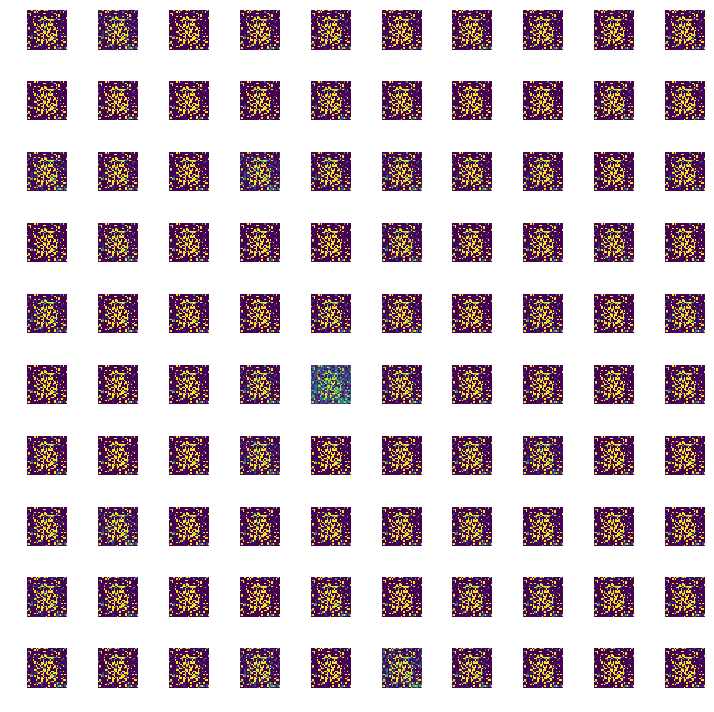

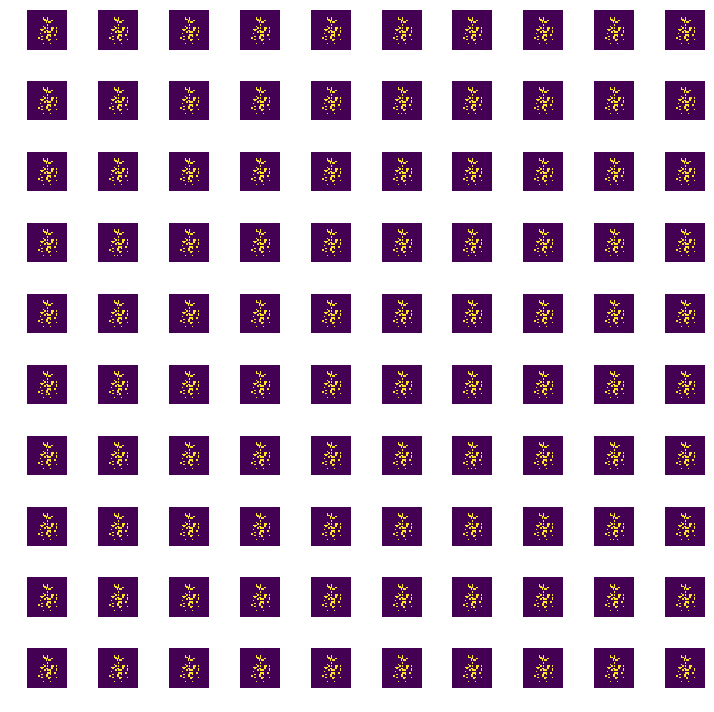

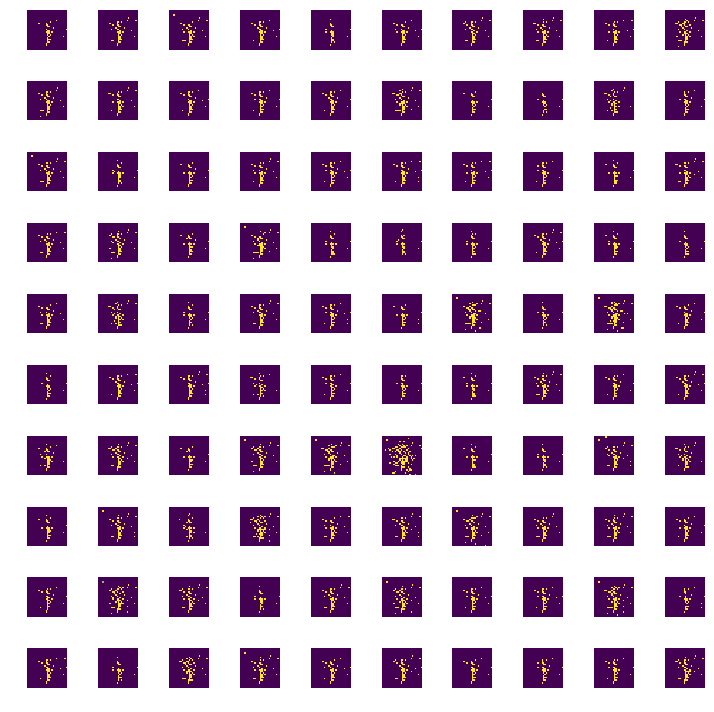

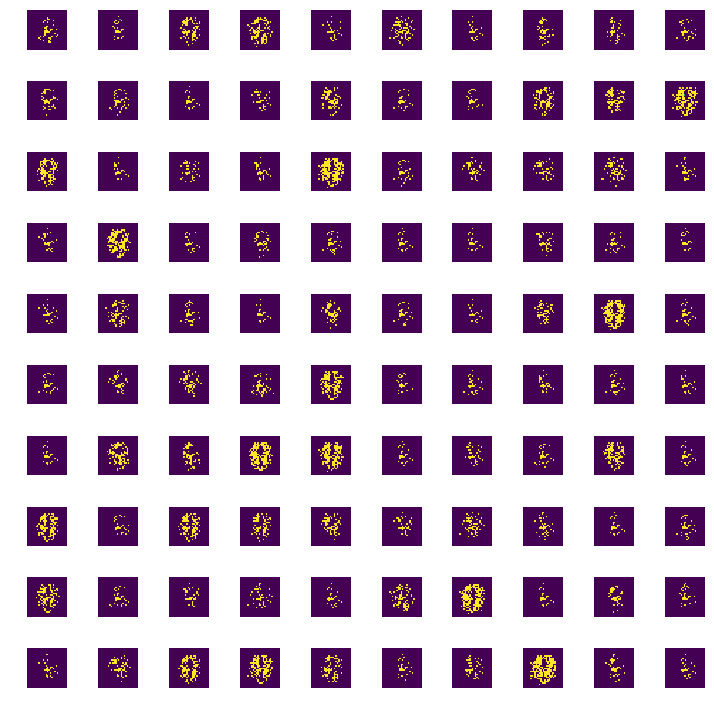

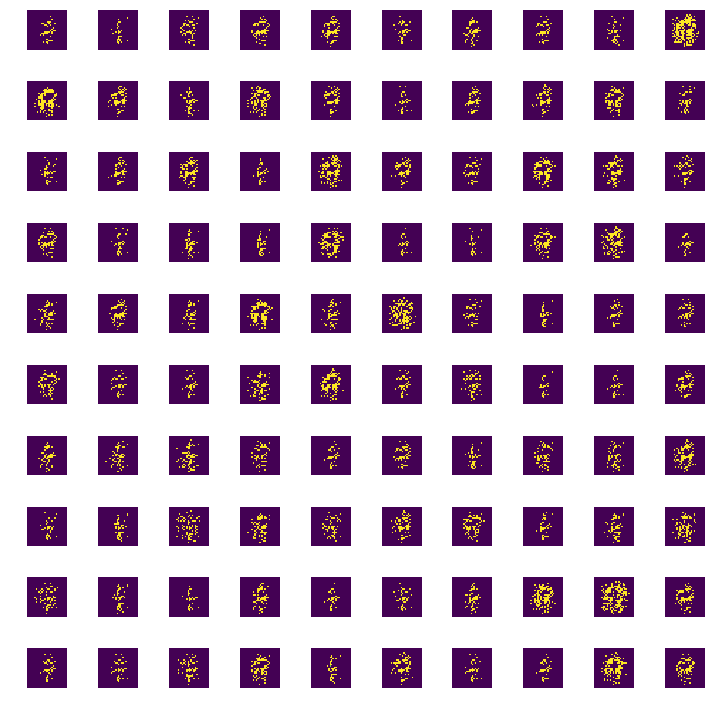

In [12]:
start_time = time()
training(400,128)
elapsed_time = time() - start_time